# Impact Approximation

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate
%run ~/.jupyter/config.ipy

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Given a system of two particles that interact we can work out their positions/velocities post interaction by integrating over the IVP and considering the force between them.

However is the interaction is small we can approximate the interaction using the impact approximation. This holds that:

$\Delta_{V} = \frac{\pi}{2bv}$ where $b$ is the point of closest approach (the impact parambeter) and $v$ the relative velocity.

In [14]:
# x is [x_pos, y_pos, vx, vy]
# this returns the derivative - dx/dt = vx, dvx/dt = a ~ the component of C / r^2 in the x direction. 
def evolve(t, x):
    return [
        x[2], 
        x[3], 
        -x[0] / (x[0]**2 + x[1]**2)**(3/2),
        -x[1] / (x[0]**2 + x[1]**2)**(3/2),
    ]

# Terminate if we crash into the central point
def crash(t, x):
    r = np.linalg.norm(x[:2])
    return r if r > 1e-7 else 0
crash.terminal = True

Not a bad approximation!
This would be better for smaller deviation, worse for larger


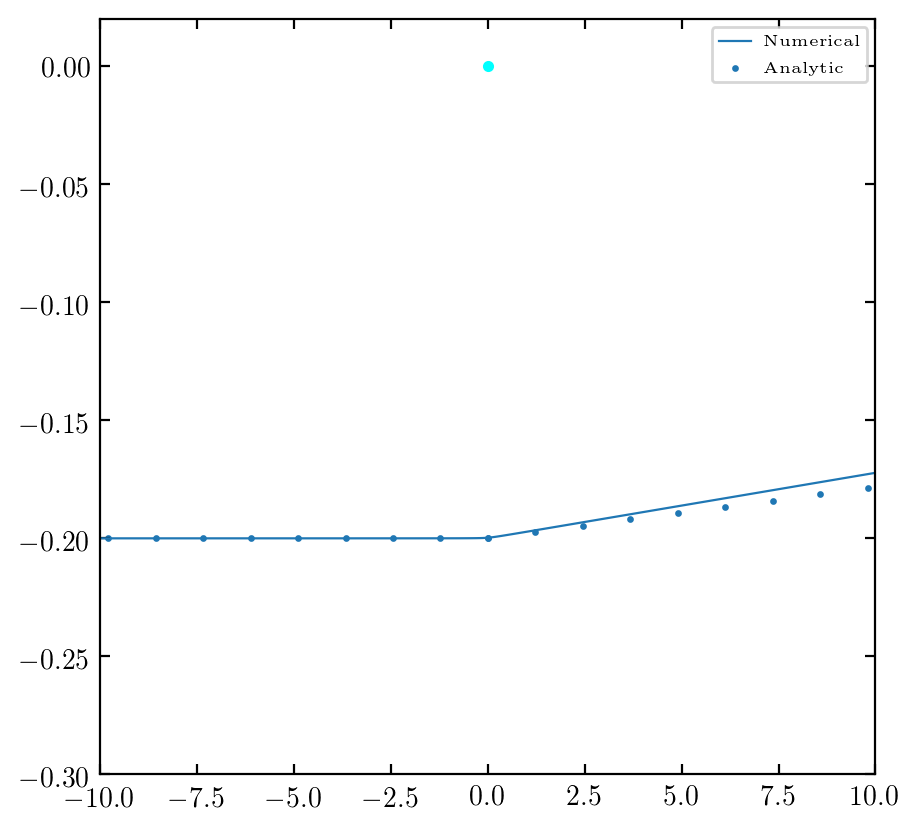

In [52]:
_, ax = plt.subplots(figsize=(5, 5))
ax.scatter([0], [0], color="cyan")

b = 0.2
v = 60

initial_conditions = [-10, -b, v, 0] # x, y, vx, vy
t_init, t_end = 0, 100

res = scipy.integrate.solve_ivp(evolve, (t_init, t_end), initial_conditions, rtol=1e-9, atol=1e-9, events=crash)
assert res.success
ax.plot(res.y[0], res.y[1], label="Numerical")

ax.set(xlim=(-10, 10), ylim=(-0.3, 0.02))

# Using the analytic formula - delta V = pi / (2bv)
delta_v = np.pi / (2 * b * v)

t = np.linspace(0, 1)

deflect_pos = np.array([[0], [-b]])
pos = np.concatenate((
    deflect_pos - t * np.array([[v], [0]]),
    deflect_pos + t * np.array([[v], [delta_v]])
), axis=1)
ax.scatter(pos[0], pos[1], s=2, label="Analytic")

ax.legend(fontsize="xx-small")
print("Not a bad approximation!")
print("This would be better for smaller deviation, worse for larger")